# Google Scholar

This notebook shows how to use the function `pymde.preserve_distances` to produce embeddings of networks, in which the goal is to preserve the shortest-path distances in the network.

It uses an academic co-authorship network collected from Google Scholar as a case study.

In [1]:
import pymde

import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
gscholar = pymde.datasets.google_scholar()

Mar 25 09:25:36 AM: Loading cached dataset.


In [3]:
scholars_df = gscholar.other_data['dataframe']
scholars_df

,name,affiliation,interests,citedby,hindex,node_id,coauthors,coauthors_pct,hindex_pct
id,,,,,,,,,
--4kM8cAAAAJ,Lude Franke,"Professor of Functional Genomics, University M...","[Genetics, Mathematics, Statistics, Bioinforma...",44250,100,0,24,0.915827,0.892764
--6BJCsAAAAJ,Joaquín Serena,Institut d'Investigació Biomèdica de Girona Id...,[Stroke],54915,63,1,4,0.372902,0.473479
--AX8lsAAAAJ,John Fleetham,University of British Columbia,[Sleep disordered breathing],18254,63,2,2,0.199689,0.473479
--RoNvAAAAAJ,Paul J Keall,Professor at the University of Sydney and Dire...,"[Medical Physics, Radiation Oncology, Medical ...",22287,73,3,5,0.442717,0.665279
--Z-kQsAAAAJ,Annette L Fitzpatrick,"Research Professor, Schools of Medicine and Pu...","[Healthy aging, cardiovascular disease, dement...",27316,71,4,1,0.104550,0.634249
...,...,...,...,...,...,...,...,...,...
zzHxKZ8AAAAJ,Christine Fennema-Notestine,"Professor of Psychiatry and Radiology, Univers...","[Cognitive Neuroscience, Neuroimaging, Alzheim...",15152,53,44677,10,0.682288,0.155253
zzJCBnwAAAAJ,Wang Fenghui,Luoyang Normal University,[Mathematics],45207,87,44678,3,0.291851,0.817701
zzmM5ggAAAAJ,Daniel Razansky,"Professor of Biomedical Imaging, University an...","[Bioengineering, Optoacoustics, Microscopy, Ul...",10945,54,44679,9,0.645472,0.194933


In [4]:
coauthorship_graph = gscholar.data

In [5]:
f'{coauthorship_graph.n_items:,} authors'

'44,682 authors'

In [6]:
f'{coauthorship_graph.n_edges:,} edges'

'210,681 edges'

In [7]:
print(f'edge density: {100*(coauthorship_graph.n_edges / (coauthorship_graph.n_all_edges)):.2f} percent')

edge density: 0.02 percent


In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

mde = pymde.preserve_distances(
    data=coauthorship_graph,
    loss=pymde.losses.Absolute,
    max_distances=1e8,
    device=device,
    verbose=True)

Mar 25 09:25:36 AM: Computing shortest path distances (retaining 10.02 percent with max_distance=None) ...
Mar 25 09:25:37 AM: processed node 1/44682
Mar 25 09:25:42 AM: processed node 4469/44682
Mar 25 09:25:46 AM: processed node 8937/44682
Mar 25 09:25:51 AM: processed node 13405/44682
Mar 25 09:25:55 AM: processed node 17873/44682
Mar 25 09:25:59 AM: processed node 22341/44682
Mar 25 09:26:04 AM: processed node 26809/44682
Mar 25 09:26:08 AM: processed node 31277/44682
Mar 25 09:26:12 AM: processed node 35745/44682
Mar 25 09:26:16 AM: processed node 40213/44682
Mar 25 09:26:20 AM: processed node 44681/44682


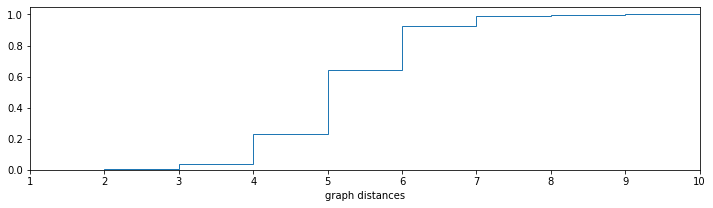

In [9]:
plt.figure(figsize=(12, 3))
original_distances = np.sort(mde.distortion_function.deviations.cpu().numpy())
ax = plt.gca()
plt.hist(original_distances, histtype='step', bins=np.arange(1, 11), density=True, cumulative=True)
plt.xlim(1, 10)
plt.xticks(np.arange(1, 11))
plt.xlabel('graph distances')
plt.show()

In [10]:
mde.embed(verbose=True)

Mar 25 09:26:33 AM: Fitting a centered embedding into R^2, for a graph with 44682 items and 88577410 edges.
Mar 25 09:26:33 AM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Mar 25 09:26:35 AM: iteration 000 | distortion 3.408162 | residual norm 0.0060119 | step length 61649.8 | percent change 124.338
Mar 25 09:26:43 AM: iteration 030 | distortion 1.540196 | residual norm 0.00022759 | step length 1 | percent change 13.3035
Mar 25 09:26:51 AM: iteration 060 | distortion 1.479409 | residual norm 0.00013548 | step length 1 | percent change 2.50924
Mar 25 09:26:58 AM: iteration 090 | distortion 1.470290 | residual norm 7.91439e-05 | step length 1 | percent change 0.566276
Mar 25 09:27:05 AM: iteration 120 | distortion 1.468277 | residual norm 4.73948e-05 | step length 1 | percent change 0.423915
Mar 25 09:27:12 AM: iteration 150 | distortion 1.467526 | residual norm 3.01974e-05 | step length 1 | percent change 0.244635
Mar 25 09:27:19 AM: iteration 180 | distortion 1

tensor([[-1.4108, -1.3177],
        [-3.5683,  0.9499],
        [-2.2836, -2.8368],
        ...,
        [-1.7356,  2.1320],
        [-1.4924, -2.1112],
        [-1.3516, -2.4478]], device='cuda:0')

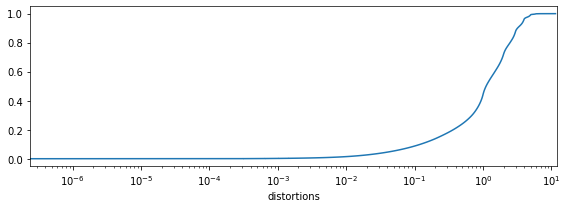

In [11]:
mde.distortions_cdf()

<AxesSubplot:>

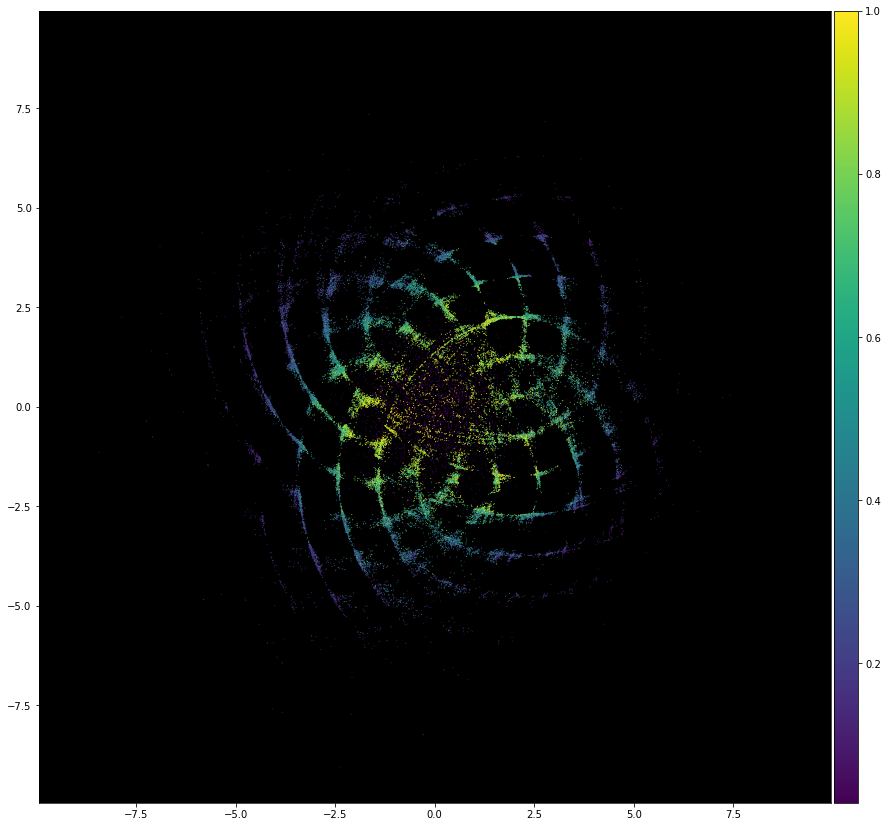

In [12]:
mde.plot(color_by=gscholar.attributes['coauthors'], color_map='viridis',
         figsize_inches=(12., 12.), background_color='k')

<AxesSubplot:>

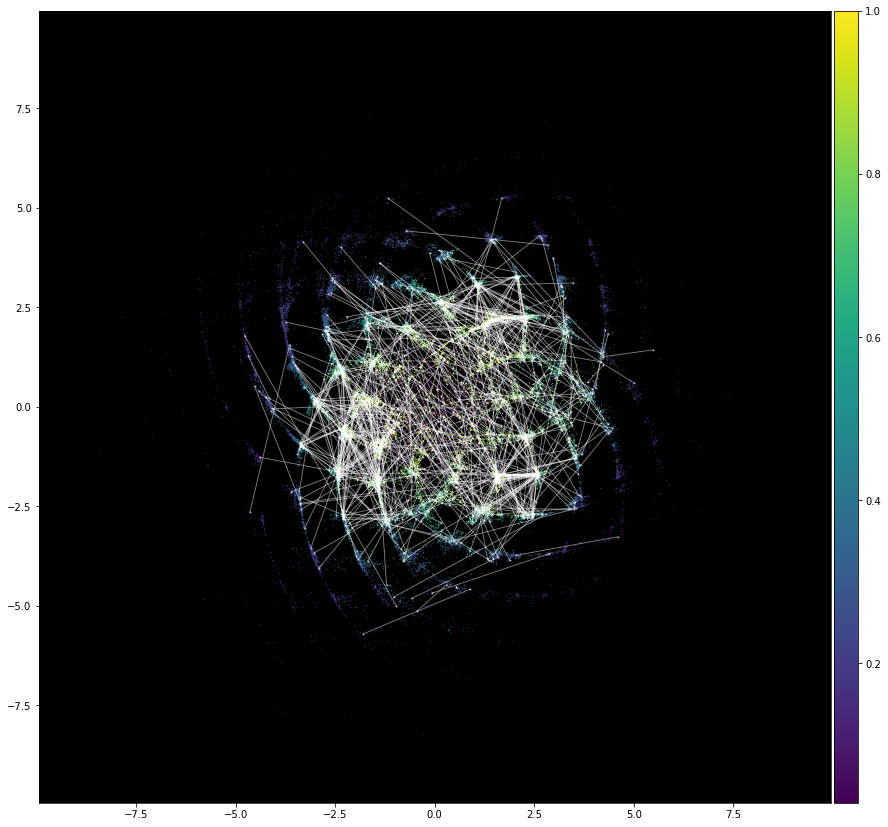

In [13]:
edges = coauthorship_graph.edges
indices = torch.randperm(edges.shape[0])[:1000]
edges = edges[indices].cpu().numpy()

mde.plot(edges=edges, color_by=gscholar.attributes['coauthors'], color_map='viridis', figsize_inches=(12, 12))

In [14]:
from matplotlib import colors


legend = {
    'bio': colors.to_rgba('tab:purple'),
    'ai': colors.to_rgba('tab:red'),
    'cs': colors.to_rgba('tab:cyan'),
    'ee': colors.to_rgba('tab:green'),
    'physics': colors.to_rgba('tab:orange')
}
scholar_disciplines_df = gscholar.other_data['disciplines']
topic_colors = [legend[code] for code in scholar_disciplines_df['topic']]

<AxesSubplot:>

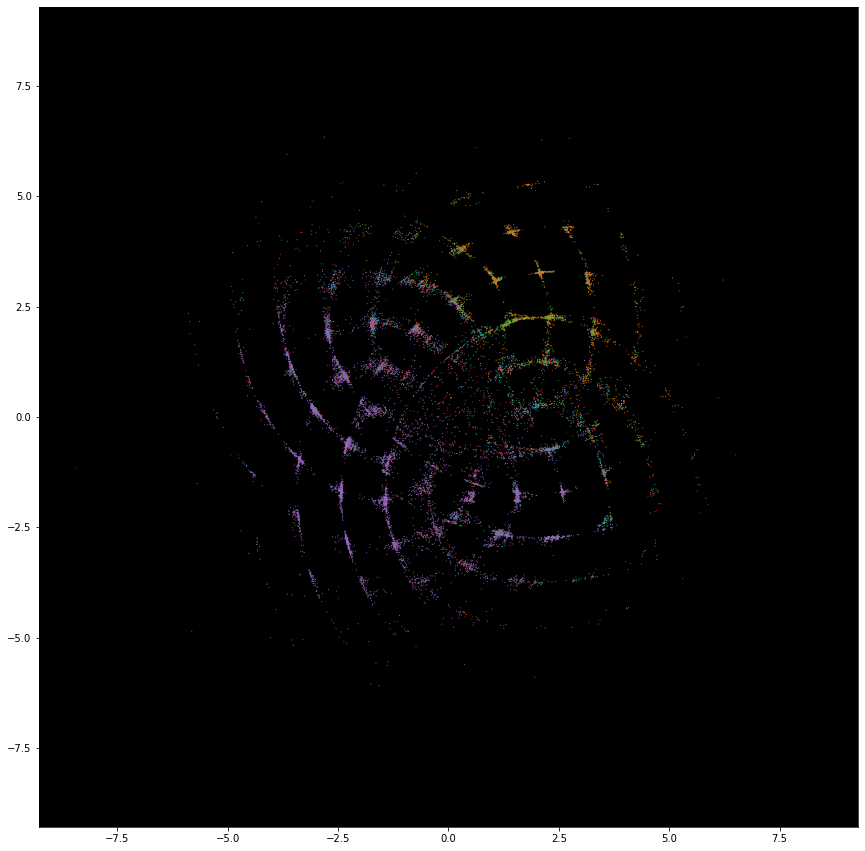

In [15]:
pymde.plot(mde.X[scholar_disciplines_df['node_id'].values], colors=topic_colors,
           figsize_inches=(12, 12), background_color='black')

## A neighbor-preserving embedding

Mar 25 09:27:58 AM: Computing 15-nearest neighbors, with max_distance=3.0
Mar 25 09:27:58 AM: Computing shortest path distances (retaining 100.00 percent with max_distance=3.0) ...
Mar 25 09:27:59 AM: processed node 1/44682
Mar 25 09:28:03 AM: processed node 4469/44682
Mar 25 09:28:07 AM: processed node 8937/44682
Mar 25 09:28:10 AM: processed node 13405/44682
Mar 25 09:28:14 AM: processed node 17873/44682
Mar 25 09:28:17 AM: processed node 22341/44682
Mar 25 09:28:21 AM: processed node 26809/44682
Mar 25 09:28:24 AM: processed node 31277/44682
Mar 25 09:28:28 AM: processed node 35745/44682
Mar 25 09:28:31 AM: processed node 40213/44682
Mar 25 09:28:35 AM: processed node 44681/44682
Mar 25 09:28:37 AM: Computing quadratic initialization.
Mar 25 09:28:40 AM: Fitting a centered embedding into R^2, for a graph with 44682 items and 997885 edges.
Mar 25 09:28:40 AM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Mar 25 09:28:40 AM: iteration 000 | distortion 0.739964 |

<AxesSubplot:>

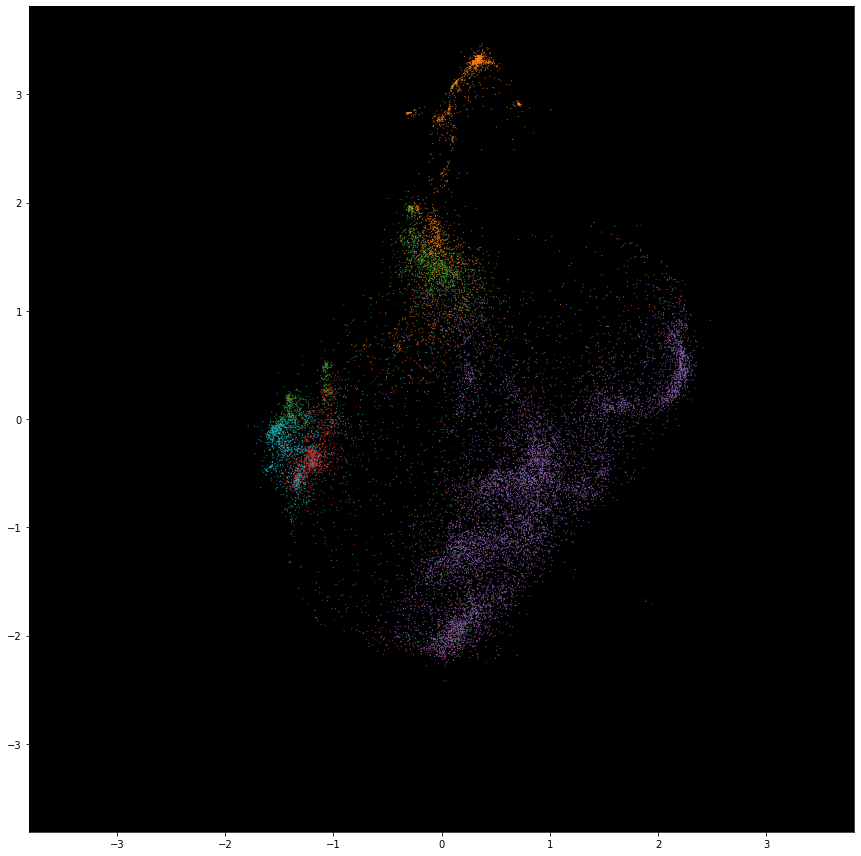

In [16]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

mde = pymde.preserve_neighbors(
    data=coauthorship_graph,
    device=device,
    verbose=True
)
mde.embed(verbose=True)
pymde.plot(mde.X[scholar_disciplines_df['node_id'].values], colors=topic_colors, figsize_inches=(12, 12), background_color='black')